In [ ]:
import sympy as sp

# Define symbolic variables for joint angles and DH parameters
theta_1, theta_2, theta_3, theta_4, theta_5 = sp.symbols("theta_1 theta_2 theta_3 theta_4 theta_5")
d_1, d_5 = sp.symbols("d_1 d_5")
a_2, a_3 = sp.symbols("a_2 a_3")
alpha = [90, 0, 0, 90, 0]

# Define gravity
g = sp.Matrix([0, 0, -9.81])

# Define masses and center of mass of each link (assuming unit masses and uniform distribution for simplicity)
masses = [1, 1, 1, 1, 1]
com = [sp.Matrix([0, 0, d_1/2]), sp.Matrix([a_2/2, 0, 0]), sp.Matrix([a_3/2, 0, 0]), sp.Matrix([0, 0, 0]), sp.Matrix([0, 0, d_5/2])]

# Helper function to create a transformation matrix from DH parameters
def dh_matrix(theta, d, a, alpha):
    alpha_rad = sp.rad(alpha)  # Convert alpha from degrees to radians
    return sp.Matrix(
        [
            [sp.cos(theta), -sp.sin(theta) * sp.cos(alpha_rad), sp.sin(theta) * sp.sin(alpha_rad), a * sp.cos(theta)],
            [sp.sin(theta), sp.cos(theta) * sp.cos(alpha_rad), -sp.cos(theta) * sp.sin(alpha_rad), a * sp.sin(theta)],
            [0, sp.sin(alpha_rad), sp.cos(alpha_rad), d],
            [0, 0, 0, 1],
        ]
    )

# Create transformation matrices for each joint using the updated parameters
A1 = dh_matrix(theta_1, d_1, 0, alpha[0])
A2 = dh_matrix(theta_2, 0, a_2, alpha[1])
A3 = dh_matrix(theta_3, 0, a_3, alpha[2])
A4 = dh_matrix(theta_4, 0, 0, alpha[3])
A5 = dh_matrix(theta_5, d_5, 0, alpha[4])

# Compute the transformation matrices from base to each joint
T1 = A1
T2 = T1 * A2
T3 = T2 * A3
T4 = T3 * A4
T5 = T4 * A5

# Positions of each center of mass
p_com = [T1[:3, 3], T2[:3, 3], T3[:3, 3], T4[:3, 3], T5[:3, 3]]

# Calculate gravitational forces acting on each link
F_g = [m * g for m in masses]

# Compute torques at each joint due to gravity
tau_g = [sp.zeros(3, 1)] * 5
for i in range(5):
    tau_g[i] = p_com[i].cross(F_g[i])

# Sum torques to find the total torque at each joint
tau_static = [sp.zeros(3, 1)] * 5
tau_static[4] = tau_g[4]
for i in reversed(range(4)):
    tau_static[i] = tau_g[i] + tau_static[i + 1]

# Combine into one vector
tau_static_vector = sp.Matrix.vstack(*tau_static)

# Initialize pretty printing for better output readability
sp.init_printing(use_unicode=True)

print("Positions of centers of mass:")
for i, p in enumerate(p_com):
    print(f"p_com[{i+1}]:")
    sp.pprint(p)
    print()

print("Gravitational forces acting on each link:")
for i, F in enumerate(F_g):
    print(f"F_g[{i+1}]:")
    sp.pprint(F)
    print()

print("Torques due to gravity at each joint:")
for i, tau in enumerate(tau_g):
    print(f"tau_g[{i+1}]:")
    sp.pprint(tau)
    print()

print("Total static torques at each joint:")
for i, tau in enumerate(tau_static):
    print(f"tau_static[{i+1}]:")
    sp.pprint(tau)
    print()

print("Combined static torque vector:")
sp.pprint(tau_static_vector)


In [6]:
import sympy as sp

# Define the computation function
def compute_torques(d_1_val, d_5_val, a_2_val, a_3_val, masses, angles):
    # Define symbolic variables for joint angles, DH parameters, masses
    theta_1, theta_2, theta_3, theta_4, theta_5 = sp.symbols(
        "theta_1 theta_2 theta_3 theta_4 theta_5"
    )
    d_1, d_5 = sp.symbols("d_1 d_5")
    a_2, a_3 = sp.symbols("a_2 a_3")
    alpha = [90, 0, 0, 90, 0]
    m1, m2, m3, m4, m5 = sp.symbols("m1 m2 m3 m4 m5")
    g = sp.Matrix([0, 0, -9.81])

    # Helper function to create a transformation matrix from DH parameters
    def dh_matrix(theta, d, a, alpha):
        alpha_rad = sp.rad(alpha)
        return sp.Matrix(
            [
                [
                    sp.cos(theta),
                    -sp.sin(theta) * sp.cos(alpha_rad),
                    sp.sin(theta) * sp.sin(alpha_rad),
                    a * sp.cos(theta),
                ],
                [
                    sp.sin(theta),
                    sp.cos(theta) * sp.cos(alpha_rad),
                    -sp.cos(theta) * sp.sin(alpha_rad),
                    a * sp.sin(theta),
                ],
                [0, sp.sin(alpha_rad), sp.cos(alpha_rad), d],
                [0, 0, 0, 1],
            ]
        )

    # Create transformation matrices
    A1 = dh_matrix(theta_1, d_1, 0, alpha[0])
    A2 = dh_matrix(theta_2, 0, a_2, alpha[1])
    A3 = dh_matrix(theta_3, 0, a_3, alpha[2])
    A4 = dh_matrix(theta_4, 0, 0, alpha[3])
    A5 = dh_matrix(theta_5, d_5, 0, alpha[4])

    # Compute the individual transformation matrices
    T1 = A1
    T2 = T1 * A2
    T3 = T2 * A3
    T4 = T3 * A4
    T5 = T4 * A5

    # Extract positions of each link's center of mass
    # Assume center of mass at the middle of each link for simplicity
    p1 = T1[:3, 3] / 2
    p2 = T2[:3, 3] / 2
    p3 = T3[:3, 3] / 2
    p4 = T4[:3, 3] / 2
    p5 = T5[:3, 3] / 2

    # Compute the Jacobians for each center of mass
    Jv1 = p1.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv2 = p2.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv3 = p3.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv4 = p4.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv5 = p5.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])

    # Compute the gravity vector for each link (assuming center of mass at the link origin)
    G1 = m1 * g
    G2 = m2 * g
    G3 = m3 * g
    G4 = m4 * g
    G5 = m5 * g

    # Compute the torques due to gravity for each link
    tau_g1 = Jv1.T * G1
    tau_g2 = Jv2.T * G2
    tau_g3 = Jv3.T * G3
    tau_g4 = Jv4.T * G4
    tau_g5 = Jv5.T * G5

    # Sum the torques due to gravity
    tau_g = tau_g1 + tau_g2 + tau_g3 + tau_g4 + tau_g5

    # Initialize pretty printing for better output readability
    sp.init_printing(use_unicode=True)

    # Provide numerical values for testing
    values = {
        d_1: d_1_val,
        d_5: d_5_val,
        a_2: a_2_val,
        a_3: a_3_val,
        m1: masses[0],
        m2: masses[1],
        m3: masses[2],
        m4: masses[3],
        m5: masses[4],
        theta_1: sp.rad(angles[0]),
        theta_2: sp.rad(angles[1]),
        theta_3: sp.rad(angles[2]),
        theta_4: sp.rad(angles[3]),
        theta_5: sp.rad(angles[4]),
    }

    # Compute numerical torques due to gravity
    numerical_torques = tau_g.subs(values)
    print("\nNumerical Torques due to Gravity:")
    sp.pprint(numerical_torques)

# Experiment with different values
d_1_val = 0.1
d_5_val = 0.1
a_2_val = 0.5
a_3_val = 0.5
masses = [1.0, 1.0, 1.0, 1.0,2.0]
angles = [0, 0, 0, 0, 0]

compute_torques(d_1_val, d_5_val, a_2_val, a_3_val, masses, angles)



Numerical Torques due to Gravity:
⎡   0    ⎤
⎢        ⎥
⎢-17.1675⎥
⎢        ⎥
⎢-7.3575 ⎥
⎢        ⎥
⎢   0    ⎥
⎢        ⎥
⎣   0    ⎦


Performing static torque analysis across all configurations...


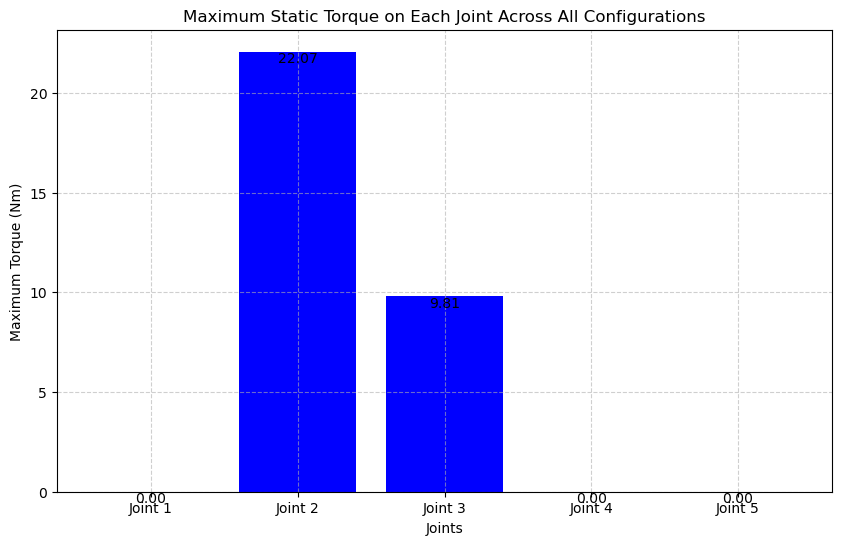

Maximum Torques for given values: [0.0, 22.0725, 9.81, 0.0, 0.0]
Maximum Torques for given values: [0.0, 22.0725, 9.81, 0.0, 0.0]


In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Define the computation function
def compute_torques(d_1_val, d_5_val, a_2_val, a_3_val, masses, mass_camera, mass_lights, external_forces, external_torques):
    # Define symbolic variables for joint angles, DH parameters, masses
    theta_1, theta_2, theta_3, theta_4, theta_5 = sp.symbols("theta_1 theta_2 theta_3 theta_4 theta_5")
    d_1, d_5 = sp.symbols("d_1 d_5")
    a_2, a_3 = sp.symbols("a_2 a_3")
    alpha = [90, 0, 0, 90, 0]
    m1, m2, m3, m4, m5 = sp.symbols("m1 m2 m3 m4 m5")
    g = sp.Matrix([0, 0, -9.81])

    # Helper function to create a transformation matrix from DH parameters
    def dh_matrix(theta, d, a, alpha):
        alpha_rad = sp.rad(alpha)
        return sp.Matrix(
            [
                [
                    sp.cos(theta),
                    -sp.sin(theta) * sp.cos(alpha_rad),
                    sp.sin(theta) * sp.sin(alpha_rad),
                    a * sp.cos(theta),
                ],
                [
                    sp.sin(theta),
                    sp.cos(theta) * sp.cos(alpha_rad),
                    -sp.cos(theta) * sp.sin(alpha_rad),
                    a * sp.sin(theta),
                ],
                [0, sp.sin(alpha_rad), sp.cos(alpha_rad), d],
                [0, 0, 0, 1],
            ]
        )

    # Create transformation matrices
    A1 = dh_matrix(theta_1, d_1, 0, alpha[0])
    A2 = dh_matrix(theta_2, 0, a_2, alpha[1])
    A3 = dh_matrix(theta_3, 0, a_3, alpha[2])
    A4 = dh_matrix(theta_4, 0, 0, alpha[3])
    A5 = dh_matrix(theta_5, d_5, 0, alpha[4])

    # Compute the individual transformation matrices
    T1 = A1
    T2 = T1 * A2
    T3 = T2 * A3
    T4 = T3 * A4
    T5 = T4 * A5

    # Extract positions of each link's center of mass
    # Assume center of mass at the middle of each link for simplicity
    p1 = T1[:3, 3] / 2
    p2 = T2[:3, 3] / 2
    p3 = T3[:3, 3] / 2
    p4 = T4[:3, 3] / 2
    p5 = T5[:3, 3] / 2

    # Compute the Jacobians for each center of mass
    Jv1 = p1.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv2 = p2.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv3 = p3.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv4 = p4.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])
    Jv5 = p5.jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])

    # Compute the gravity vector for each link (assuming center of mass at the link origin)
    G1 = m1 * g
    G2 = m2 * g
    G3 = m3 * g
    G4 = m4 * g
    G5 = (m5 + mass_camera + mass_lights) * g  # Adding camera and lights masses to the last link

    # Compute the torques due to gravity for each link
    tau_g1 = Jv1.T * G1
    tau_g2 = Jv2.T * G2
    tau_g3 = Jv3.T * G3
    tau_g4 = Jv4.T * G4
    tau_g5 = Jv5.T * G5

    # Define symbolic variables for external forces and torques
    F_ext_x, F_ext_y, F_ext_z = sp.symbols("F_ext_x F_ext_y F_ext_z")
    T_ext_1, T_ext_2, T_ext_3, T_ext_4, T_ext_5 = sp.symbols("T_ext_1 T_ext_2 T_ext_3 T_ext_4 T_ext_5")

    F_ext = sp.Matrix([F_ext_x, F_ext_y, F_ext_z])
    T_ext = sp.Matrix([T_ext_1, T_ext_2, T_ext_3, T_ext_4, T_ext_5])

    # Compute the Jacobian for the external force application point (assuming it is the end effector)
    Jv_ext = T5[:3, 3].jacobian([theta_1, theta_2, theta_3, theta_4, theta_5])

    # Compute the torques due to external forces and torques
    tau_ext_forces = Jv_ext.T * F_ext
    tau_ext = tau_ext_forces + T_ext

    # Sum the torques due to gravity and external forces/torques
    tau_total = tau_g1 + tau_g2 + tau_g3 + tau_g4 + tau_g5 + tau_ext

    # Simplify the total torques
    tau_total_simplified = sp.simplify(tau_total)

    # Provide numerical values for testing
    values = {
        d_1: d_1_val,
        d_5: d_5_val,
        a_2: a_2_val,
        a_3: a_3_val,
        m1: masses[0],
        m2: masses[1],
        m3: masses[2],
        m4: masses[3],
        m5: masses[4],
        F_ext_x: external_forces[0],
        F_ext_y: external_forces[1],
        F_ext_z: external_forces[2],
        T_ext_1: external_torques[0],
        T_ext_2: external_torques[1],
        T_ext_3: external_torques[2],
        T_ext_4: external_torques[3],
        T_ext_5: external_torques[4],
        theta_1: 0,  # For the initial computation, set angles to 0
        theta_2: 0,
        theta_3: 0,
        theta_4: 0,
        theta_5: 0,
    }

    # Initialize the maximum torque tracker
    max_torque_per_joint = np.zeros(5)

    # Define the range for joint angles
    angle_range = np.linspace(-np.pi, np.pi, 10)  # 10 steps from -π to π

    # Generate all combinations of joint angles
    angle_combinations = product(angle_range, repeat=5)

    # Precompute torque function
    tau_total_func = sp.lambdify(
        (theta_1, theta_2, theta_3, theta_4, theta_5),
        tau_total_simplified.subs(values),
        "numpy",
    )

    # Iterate over all angle combinations and compute torques
    for angles in angle_combinations:
        numerical_torques = np.array(tau_total_func(*angles), dtype=float).flatten()
        max_torque_per_joint = np.maximum(max_torque_per_joint, np.abs(numerical_torques))

    # Plot the maximum torques
    joints = ["Joint 1", "Joint 2", "Joint 3", "Joint 4", "Joint 5"]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(joints, max_torque_per_joint.tolist(), color="blue")
    plt.xlabel("Joints")
    plt.ylabel("Maximum Torque (Nm)")
    plt.title("Maximum Static Torque on Each Joint Across All Configurations")
    plt.grid(True, linestyle="--", alpha=0.6)

    # Annotate bars with their values
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            f"{yval:.2f}",
            va="bottom" if yval < 0 else "top",
            ha="center",
            color="black",
        )

    plt.show()

    # Print the maximum torques
    print(f"Maximum Torques for given values: {max_torque_per_joint.tolist()}")
    return max_torque_per_joint.tolist()


# Experiment with different values
d_1_val = 0.1
d_5_val = 0.1
a_2_val = 0.5
a_3_val = 0.5
masses = [1.0, 1.0, 1.0, 1.0, 1.0]
mass_camera = 0.5
mass_lights = 0.5
external_forces = [0, 0, 0]  # No external forces in this example
external_torques = [0, 0, 0, 0, 0]  # No external torques in this example

# Note: This is a static analysis
print("Performing static torque analysis across all configurations...")
max_torque_per_joint = compute_torques(
    d_1_val,
    d_5_val,
    a_2_val,
    a_3_val,
    masses,
    mass_camera,
    mass_lights,
    external_forces,
    external_torques,
)

print(f"Maximum Torques for given values: {max_torque_per_joint}")
